## 🧠 Stage 1: Foundations of Machine Learning and Deep Learning

### Topics
- **Deep Learning Introduction**:
  - Neural Networks: Perceptrons, Activation Functions.
  - Forward and Backward Propagation.
  - Gradient Descent and Optimization.

# 🔷 Activation Functions

Activation Functions:
Activation functions are crucial components of neural networks because they introduce non-linearity into the model, allowing the network to learn complex patterns. Without activation functions, the neural network would essentially be a linear model, no matter how many layers it has. In other words, activation functions enable neural networks to approximate non-linear functions.

There are various types of activation functions, each with its characteristics. The most commonly used ones are:

- **Sigmoid**:

    -The sigmoid function maps any input value to a range between 0 and 1. It's especially useful for binary classification problems as it can represent probabilities.

    -Formula: $$\sigma(x)=\frac{1}{1+e^{-x}}$$

    -The sigmoid function has a "squashing" effect, which can lead to issues like vanishing gradients during training.

- **ReLU (Rectified Linear Unit)**:

    - ReLU is one of the most popular activation functions. It outputs the input directly if it is positive; otherwise, it outputs zero.

    - Formula: $$ReLU(x)= max(0,x)$$

    - ReLU is computationally efficient and avoids the vanishing gradient problem, but it can lead to "dead neurons" where neurons never activate (for negative inputs).

- **Leaky ReLU**:
    - Leaky ReLU is a variant of ReLU that allows a small, non-zero gradient when the input is negative.

    - Formula: $$Leaky ReLU(x)=max(αx,x)$$, where $\alpha$ is a small constant (e.g., 0.01).

    - It prevents the "dead neuron" issue from ReLU.

- **Tanh (Hyperbolic Tangent)**:

    - Tanh is similar to sigmoid but it maps input to a range between -1 and 1, which makes it zero-centered and better suited for many tasks.

    - Formula: $$tanh(x)= \frac{2}{1+e^{-2x}}-1$$

    - While Tanh is zero-centered, it still suffers from the vanishing gradient problem for large inputs.

- **Softmax**:

    - Softmax is typically used in the output layer of a network for multi-class classification. It converts raw scores (logits) into probabilities.

    -Formula: $$ Softmax(x)=\frac{e^{x_i}}{\sum_{j}e^{x_j}}$$ where $x_i$ is the input 

Next is a visualization of each activation function:

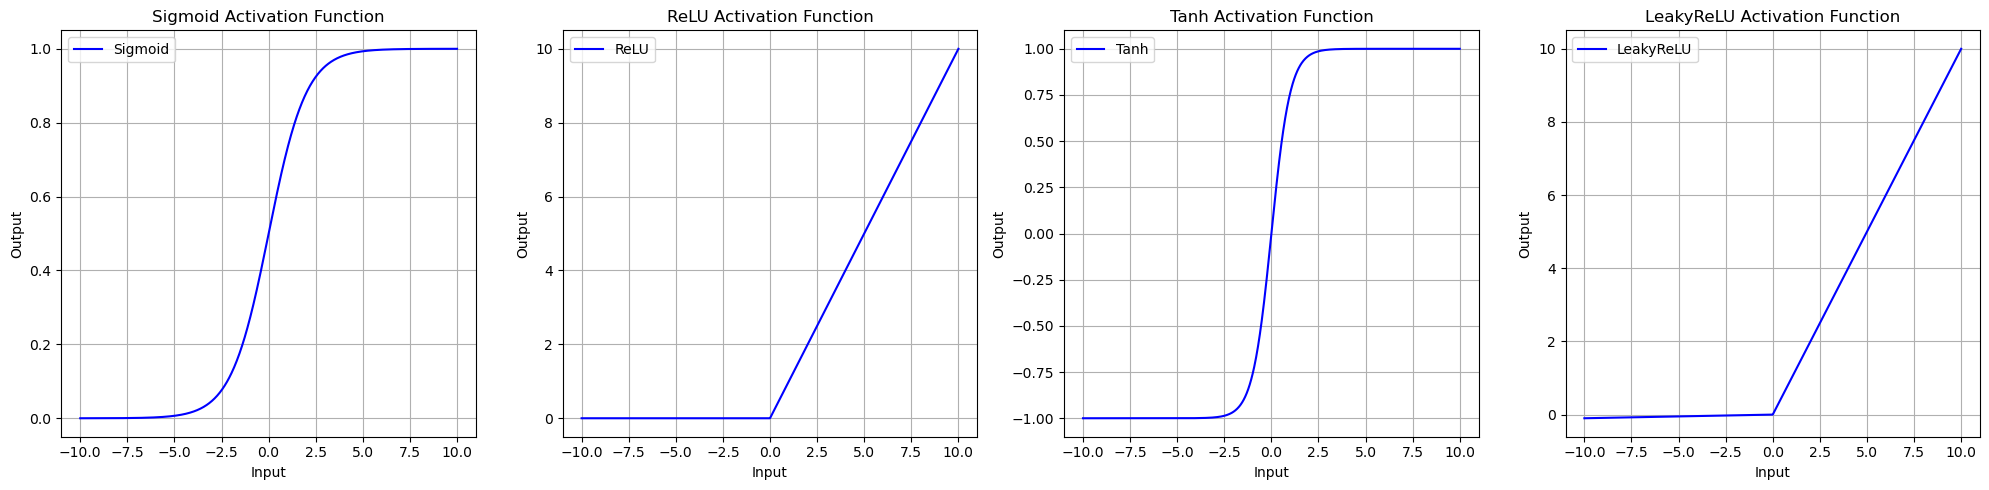

In [4]:
import torch
import matplotlib.pyplot as plt
import numpy as np

# Define the activation functions
activation_functions = {
    "Sigmoid": torch.sigmoid,
    "ReLU": torch.relu,
    "Tanh": torch.tanh,
    "LeakyReLU": torch.nn.functional.leaky_relu,
}

# Generate an input range from -10 to 10
x = torch.linspace(-10, 10, 1000)

# Create a subplot to display the activation functions
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

# Plot each activation function
for i, (name, activation_fn) in enumerate(activation_functions.items()):
    axs[i].plot(x.numpy(), activation_fn(x).detach().numpy(), label=name, color='b')
    axs[i].set_title(f"{name} Activation Function")
    axs[i].set_xlabel("Input")
    axs[i].set_ylabel("Output")
    axs[i].grid(True)
    axs[i].legend()

# Display the plot
plt.tight_layout()
plt.show()


# 🔷 Perceptron

The perceptron is the simplest form of an artificial neuron, introduced by Rosenblatt (1958). It computes a weighted sum of its inputs and passes it through an activation function:

$$y=f(w^Tx+b)$$

where

- $x \in \mathbb{R}^n$ is the input vector
- $w \in \mathbb{R}^n$ is the weight vector
- $b \in \mathbb{R}$ is the bias term
- $f(\cdot)$ is the activation function
- $y$ is the output

In the following, you'll find an example code that demonstrates a perceptron.

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from torchviz import make_dot
from IPython.display import Image
import os
        
# Load the wine dataset, a very famous one
wine = load_wine()
X = wine.data
y = wine.target
        
# Convert labels to one-hot encoding for multi-class classification
y_one_hot = torch.tensor(y).long()
        
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
        
# Convert to torch tensors
X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
        
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_one_hot, test_size=0.2, random_state=42)
        
# Define the simple Perceptron model with a single hidden layer
class Perceptron(nn.Module):
        
    def __init__(self):
        super(Perceptron, self).__init__()
        self.fc1 = nn.Linear(13, 50)  # 13 input features, 50 units in hidden layer
        self.fc2 = nn.Linear(50, 3)   # Output layer with 3 classes
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))    # ReLU activation in the hidden layer
        x = self.fc2(x)                # Output layer (no activation here, will use CrossEntropyLoss)
        return x

# Instantiate model
model = Perceptron()

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()     # For multi-class classification
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    
    optimizer.zero_grad()            # Zero the gradients
    outputs = model(X_train)         # Forward pass
    loss = criterion(outputs, y_train)  # Compute the loss
    loss.backward()                  # Backward pass
    optimizer.step()                 # Update weights

    if (epoch + 1) % 10 == 0:
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}')

# Testing the model
model.eval()
with torch.no_grad():
    y_pred = model(X_test)
    _, predicted = torch.max(y_pred, 1)
    accuracy = accuracy_score(y_test, predicted)
    print(f'Accuracy on test data: {accuracy * 100:.2f}%')


Epoch 10/100, Loss: 0.9875
Epoch 20/100, Loss: 0.9146
Epoch 30/100, Loss: 0.8495
Epoch 40/100, Loss: 0.7907
Epoch 50/100, Loss: 0.7374
Epoch 60/100, Loss: 0.6888
Epoch 70/100, Loss: 0.6444
Epoch 80/100, Loss: 0.6036
Epoch 90/100, Loss: 0.5661
Epoch 100/100, Loss: 0.5316
Accuracy on test data: 94.44%


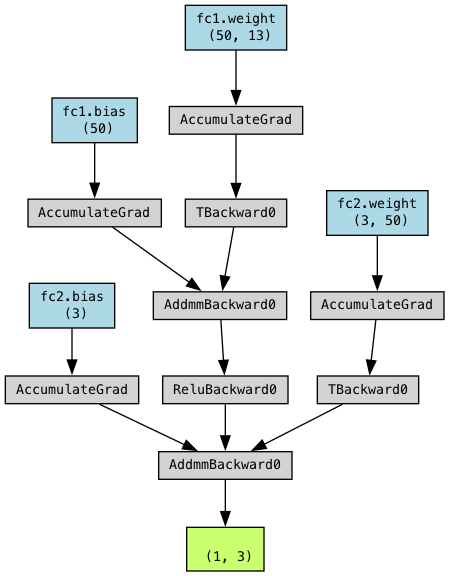

In [8]:
sample_input = X_train[:1]  # just one sample to keep the graph small
sample_output = model(sample_input)
#Visualize the graph: Input → FC1 → ReLU → FC2 → Output
dot = make_dot(sample_output, params=dict(model.named_parameters()))

# Render it as a PNG to a temporary file
dot.render("perceptron", format="png")

# Display the image inline
Image(filename="perceptron.png")


# 🔷 Multilayer Perceptron (MLP)

A **Multilayer Perceptron (MLP)}** is an extension of the perceptron that includes multiple layers of neurons. Each layer applies a linear transformation followed by a nonlinear activation function. This enables the network to learn more complex functions.

The forward pass in an MLP can be written as:

$$h^{(1)} = f^{(1)}(W^{(1)}x + b^{(1)}) $$
$$ h^{(2)} = f^{(2)}(W^{(2)}h^{(1)} + b^{(2)})$$
$$\vdots $$
$$y = f^{(L)}(W^{(L)}h^{(L-1)} + b^{(L)})$$



where:

- $L$ is the number of layers
- $W^{(i)}$ and $b^{(i)}$ are the weights and biases at layer $i$
- $f^{(i)}$ is the activation function at layer $i$
- $h^{(i)}$ is the output of the $i$-th hidden layer
- $y$ is the final output

Feedforward networks also known as Multilayer Percetrons form the foundation of many advanced architectures in deep learning, serving as a conceptual stepping stone toward more complex models such as recurrent neural networks (RNNs), convolutional neural networks (CNNs), and transformer-based architectures. They are among the simplest types of artificial neural networks but remain widely used due to their versatility in function approximation and classification tasks.
These networks are characterized by their directed, layer-wise structure, where information flows strictly forward—from the input layer through one or more hidden layers to the output layer—without forming cycles or loops.

Feedforward networks are often described in terms of their composition of multiple functions. For instance, a network with three layers may be expressed as:

$$
f(x) = f^{(3)}(f^{(2)}(f^{(1)}(x)))$$

where each function $ f^{(i)} $ corresponds to a specific layer, transforming its input into a new representation before passing it to the next layer. This hierarchical composition allows the network to learn increasingly abstract and complex features as data propagates through the layers.


<div style="width: 300px; margin: 0 auto; text-align: center;">
  <img src="deep_network.png" alt="Feedforward Network creada con Dall-e" width="750%">
</div>
In the following, you'll find an example code that demonstrates a multilayer perceptron.

In [11]:

# Modified MLP with dropout
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(13, 128)
        self.drop1 = nn.Dropout(0.3)
        self.fc2 = nn.Linear(128, 32)
        self.drop2 = nn.Dropout(0.3)
        self.fc3 = nn.Linear(32, 16)
        self.out = nn.Linear(16, 3)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.drop1(x)
        x = torch.relu(self.fc2(x))
        x = self.drop2(x)
        x = torch.relu(self.fc3(x))
        x = self.out(x)
        return x

# Instantiate model
model = MLP()

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, weight_decay=1e-4)

# Training loop
num_epochs = 300
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 20 == 0:
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}')

# Evaluate on test set
model.eval()
with torch.no_grad():
    y_pred = model(X_test)
    _, predicted = torch.max(y_pred, 1)
    accuracy = accuracy_score(y_test, predicted)
    print(f'Accuracy on test data: {accuracy * 100:.2f}%')




Epoch 20/300, Loss: 1.0973
Epoch 40/300, Loss: 1.0864
Epoch 60/300, Loss: 1.0850
Epoch 80/300, Loss: 1.0747
Epoch 100/300, Loss: 1.0718
Epoch 120/300, Loss: 1.0574
Epoch 140/300, Loss: 1.0499
Epoch 160/300, Loss: 1.0394
Epoch 180/300, Loss: 1.0360
Epoch 200/300, Loss: 1.0089
Epoch 220/300, Loss: 1.0022
Epoch 240/300, Loss: 0.9710
Epoch 260/300, Loss: 0.9655
Epoch 280/300, Loss: 0.9313
Epoch 300/300, Loss: 0.9130
Accuracy on test data: 80.56%


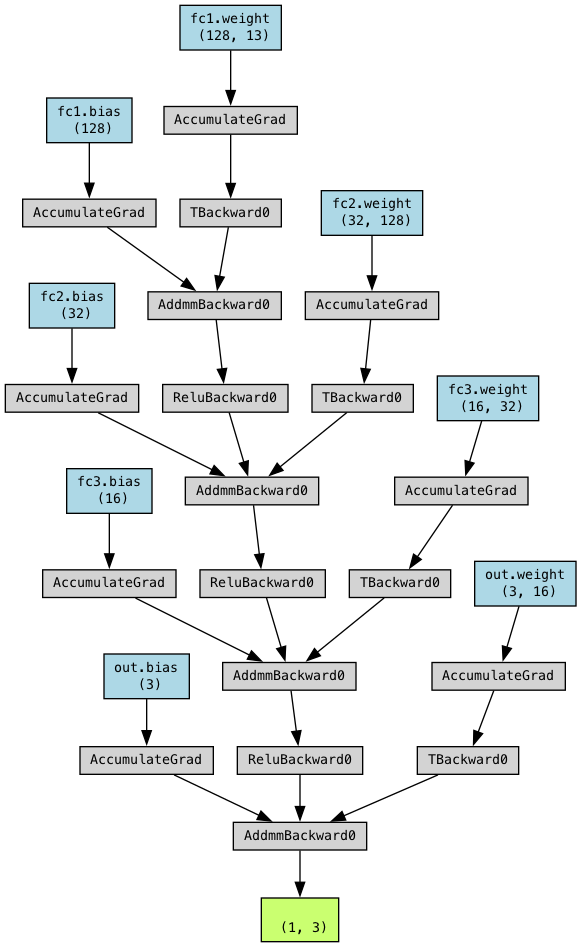

In [12]:
sample_input = X_train[:1]  # just one sample to keep the graph small
sample_output = model(sample_input)
#Visualize the graph: Input → FC1 → ReLU → FC2 → Output
dot = make_dot(sample_output, params=dict(model.named_parameters()))

# Render it as a PNG to a temporary file
dot.render("perceptron", format="png")

# Display the image inline
Image(filename="perceptron.png")

# 🔷 Forward Propagation

Forward propagation is the process by which the input data passes through the neural network layer by layer to produce an output (prediction).

- **Input Layer**: The input vector ${x}$ is fed into the network.
    
    - Hidden Layers: For each layer $l = 1, 2, \ldots, L$:

        $z^{(l)} = W^{(l)}{a}^{(l-1)} + {b}^{(l)} $
        ${a}^{(l)} = \sigma({z}^{(l)})$

    where

- ${W}^{(l)}$ is the weight matrix of layer $l$,
- ${b}^{(l)}$ is the bias vector of layer $l$,
- ${a}^{(l-1)}$ is the activation vector from the previous layer (with ${a}^{(0)} = {x}$),
- $\sigma(\cdot)$ is a nonlinear activation function such as ReLU, sigmoid, or tanh.

    
- **Output Layer** : Produces the final output
    $$
        \hat{{y}} = {a}^{(L)}
    $$
  which can be raw scores (logits), regression outputs, or probabilities (e.g., after softmax).




# 🔷 Backward Propagation

Backward propagation computes gradients of the loss function with respect to all weights and biases, enabling the network to learn via gradient descent.

**Goal:** Compute  
$$
\frac{\partial \mathcal{L}}{\partial \mathbf{W}^{(l)}}, \quad \frac{\partial \mathcal{L}}{\partial \mathbf{b}^{(l)}}
$$  
for each layer $l$, where $\mathcal{L}$ is the loss function comparing the prediction $\hat{\mathbf{y}}$ and true label $\mathbf{y}$.

---

### **Steps:**

**1. Compute the loss:**  
(e.g., cross-entropy or mean squared error)  
$$
\mathcal{L}(\hat{\mathbf{y}}, \mathbf{y})
$$

---

**2. Calculate the error at the output layer:**  
$$
\boldsymbol{\delta}^{(L)} = \frac{\partial \mathcal{L}}{\partial \mathbf{z}^{(L)}} = \frac{\partial \mathcal{L}}{\partial \mathbf{a}^{(L)}} \odot \sigma'(\mathbf{z}^{(L)})
$$  
where $\odot$ denotes element-wise multiplication, and $\sigma'(\cdot)$ is the derivative of the activation function.

---

**3. Propagate the error backward for each hidden layer** $l = L-1, \ldots, 1$:  
$$
\boldsymbol{\delta}^{(l)} = \left( \mathbf{W}^{(l+1)\top} \boldsymbol{\delta}^{(l+1)} \right) \odot \sigma'(\mathbf{z}^{(l)})
$$

---

**4. Compute gradients with respect to weights and biases:**  
$$
\frac{\partial \mathcal{L}}{\partial \mathbf{W}^{(l)}} = \boldsymbol{\delta}^{(l)} \mathbf{a}^{(l-1)\top}
$$

$$
\frac{\partial \mathcal{L}}{\partial \mathbf{b}^{(l)}} = \boldsymbol{\delta}^{(l)}
$$

---

**5. Update weights and biases using gradient descent:**  
$$
\mathbf{W}^{(l)} \leftarrow \mathbf{W}^{(l)} - \eta \frac{\partial \mathcal{L}}{\partial \mathbf{W}^{(l)}}
$$

$$
\mathbf{b}^{(l)} \leftarrow \mathbf{b}^{(l)} - \eta \frac{\partial \mathcal{L}}{\partial \mathbf{b}^{(l)}}
$$  
where $\eta$ is the learning rate.

---

### ✅ **Summary**

| Process              | Description                                                                 |
|----------------------|-----------------------------------------------------------------------------|
| Forward Propagation  | Input passes forward through layers; activations computed; final prediction $\hat{\mathbf{y}}$ is produced. |
| Backward Propagation | Errors propagate backward; gradients for weights and biases calculated; parameters updated to minimize loss. |


In [17]:
import numpy as np
import pandas as pd

# ---- Activation functions ----
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(a):
    return a * (1 - a)

# ---- Loss function (Mean Squared Error) ----
def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def mse_derivative(y_true, y_pred):
    return (y_pred - y_true)

# ---- Generate synthetic data ----
np.random.seed(0)
n_samples = 100
X_df = pd.DataFrame(np.random.rand(n_samples, 3), columns=['x1', 'x2', 'x3'])
y_df = pd.DataFrame(np.random.randint(0, 2, size=(n_samples, 1)), columns=['y'])

X = X_df.values  # shape: (100, 3)
y = y_df.values  # shape: (100, 1)

# ---- Network architecture ----
input_size = 3
hidden1_size = 5
hidden2_size = 4
output_size = 1
lr = 0.1  # learning rate

# ---- Initialize weights and biases ----
W1 = np.random.randn(input_size, hidden1_size)
b1 = np.zeros((1, hidden1_size))

W2 = np.random.randn(hidden1_size, hidden2_size)
b2 = np.zeros((1, hidden2_size))

W3 = np.random.randn(hidden2_size, output_size)
b3 = np.zeros((1, output_size))

# ---- Training loop ----
epochs = 1000
for epoch in range(epochs):
    # === FORWARD PROPAGATION ===
    Z1 = np.dot(X, W1) + b1
    A1 = sigmoid(Z1)

    Z2 = np.dot(A1, W2) + b2
    A2 = sigmoid(Z2)

    Z3 = np.dot(A2, W3) + b3
    A3 = sigmoid(Z3)  # output layer

    # === LOSS ===
    loss = mse_loss(y, A3)

    # === BACKWARD PROPAGATION ===
    dA3 = mse_derivative(y, A3)
    dZ3 = dA3 * sigmoid_derivative(A3)
    dW3 = np.dot(A2.T, dZ3) / n_samples
    db3 = np.mean(dZ3, axis=0, keepdims=True)

    dA2 = np.dot(dZ3, W3.T)
    dZ2 = dA2 * sigmoid_derivative(A2)
    dW2 = np.dot(A1.T, dZ2) / n_samples
    db2 = np.mean(dZ2, axis=0, keepdims=True)

    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * sigmoid_derivative(A1)
    dW1 = np.dot(X.T, dZ1) / n_samples
    db1 = np.mean(dZ1, axis=0, keepdims=True)

    # === UPDATE PARAMETERS ===
    W3 -= lr * dW3
    b3 -= lr * db3
    W2 -= lr * dW2
    b2 -= lr * db2
    W1 -= lr * dW1
    b1 -= lr * db1

    # Optional: print loss occasionally
    if epoch % 100 == 0:
        print(f"Epoch {epoch}: Loss = {loss:.4f}")


Epoch 0: Loss = 0.3014
Epoch 100: Loss = 0.2490
Epoch 200: Loss = 0.2478
Epoch 300: Loss = 0.2477
Epoch 400: Loss = 0.2476
Epoch 500: Loss = 0.2476
Epoch 600: Loss = 0.2475
Epoch 700: Loss = 0.2474
Epoch 800: Loss = 0.2473
Epoch 900: Loss = 0.2472


## 🌄 Gradient Descent: Concept

Gradient Descent is an optimization algorithm used to minimize a function (typically a loss function in ML models) by iteratively moving in the direction of the **negative gradient**.

Given parameters $\theta$ and a loss function $\mathcal{L}(\theta)$, the update rule is:

$$
\theta \leftarrow \theta - \eta \nabla_\theta \mathcal{L}(\theta)
$$

- $\theta$: model parameters (e.g., weights)
- $\eta$: learning rate
- $\nabla_\theta \mathcal{L}$: gradient of the loss with respect to parameters

---

## 🔁 Variants of Gradient Descent

### 1. **Batch Gradient Descent**
- Computes the gradient using **all training samples**.
- Very stable but **computationally expensive** for large datasets.

**Update:**
$$
\theta \leftarrow \theta - \eta \nabla_\theta \mathcal{L}_{\text{batch}}(\theta)
$$

---

### 2. **Stochastic Gradient Descent (SGD)**
- Computes gradient using **only one sample**.
- Very noisy updates but fast and can help escape local minima.

**Update:**
$$
\theta \leftarrow \theta - \eta \nabla_\theta \mathcal{L}_{\text{sample}}(\theta)
$$

---

### 3. **Mini-Batch Gradient Descent**
- A compromise between batch and SGD.
- Uses a small **batch of samples** to compute the gradient.

**Update:**
$$
\theta \leftarrow \theta - \eta \nabla_\theta \mathcal{L}_{\text{mini-batch}}(\theta)
$$

---

## ⏱ Momentum

Accelerates SGD by **accumulating a velocity vector** in directions of consistent gradients.

**Update:**
$$
v_t = \gamma v_{t-1} + \eta \nabla_\theta \mathcal{L}(\theta) \\
\theta \leftarrow \theta - v_t
$$

- $\gamma$: momentum factor (e.g., 0.9)

---

## 🎯 AdaGrad

Adapts learning rate per parameter based on past gradients. Slows down learning for frequently updated parameters.

**Update:**
$$
r_t = r_{t-1} + \nabla_\theta \mathcal{L}(\theta)^2 \\
\theta \leftarrow \theta - \frac{\eta}{\sqrt{r_t} + \epsilon} \nabla_\theta \mathcal{L}(\theta)
$$

- $\epsilon$: small number to avoid division by zero

---

## 🌊 RMSProp

Improves AdaGrad by using an **exponential moving average** of squared gradients instead of sum.

**Update:**
$$
r_t = \rho r_{t-1} + (1 - \rho)\nabla_\theta \mathcal{L}(\theta)^2 \\
\theta \leftarrow \theta - \frac{\eta}{\sqrt{r_t} + \epsilon} \nabla_\theta \mathcal{L}(\theta)
$$

- $\rho$: decay rate (e.g., 0.9)

---

## ⚡ Adam (Adaptive Moment Estimation)

Combines Momentum and RMSProp. Maintains both **first moment (mean)** and **second moment (uncentered variance)** of gradients.

**Update:**
$$
m_t = \beta_1 m_{t-1} + (1 - \beta_1)\nabla_\theta \mathcal{L}(\theta) \\
v_t = \beta_2 v_{t-1} + (1 - \beta_2)(\nabla_\theta \mathcal{L}(\theta))^2
$$

Bias-corrected:
$$
\hat{m}_t = \frac{m_t}{1 - \beta_1^t}, \quad \hat{v}_t = \frac{v_t}{1 - \beta_2^t}
$$

Parameter update:
$$
\theta \leftarrow \theta - \frac{\eta}{\sqrt{\hat{v}_t} + \epsilon} \hat{m}_t
$$

- Typically: $\beta_1 = 0.9$, $\beta_2 = 0.999$, $\epsilon = 10^{-8}$

---

## ✅ Summary Table

| Method     | Speed     | Stability | Adaptivity | Notes |
|------------|-----------|-----------|------------|-------|
| Batch      | Slow      | Very High | ❌         | Exact gradient |
| SGD        | Fast      | Noisy     | ❌         | Good for large data |
| Mini-Batch | Moderate  | Good      | ❌         | Most used |
| Momentum   | Faster    | Better    | ❌         | Helps escape local minima |
| AdaGrad    | Adaptive  | Slows down| ✅         | Good for sparse data |
| RMSProp    | Adaptive  | Stable    | ✅         | Fixes AdaGrad issue |
| Adam       | Fast + Adaptive | Very Good | ✅ | Often best default |



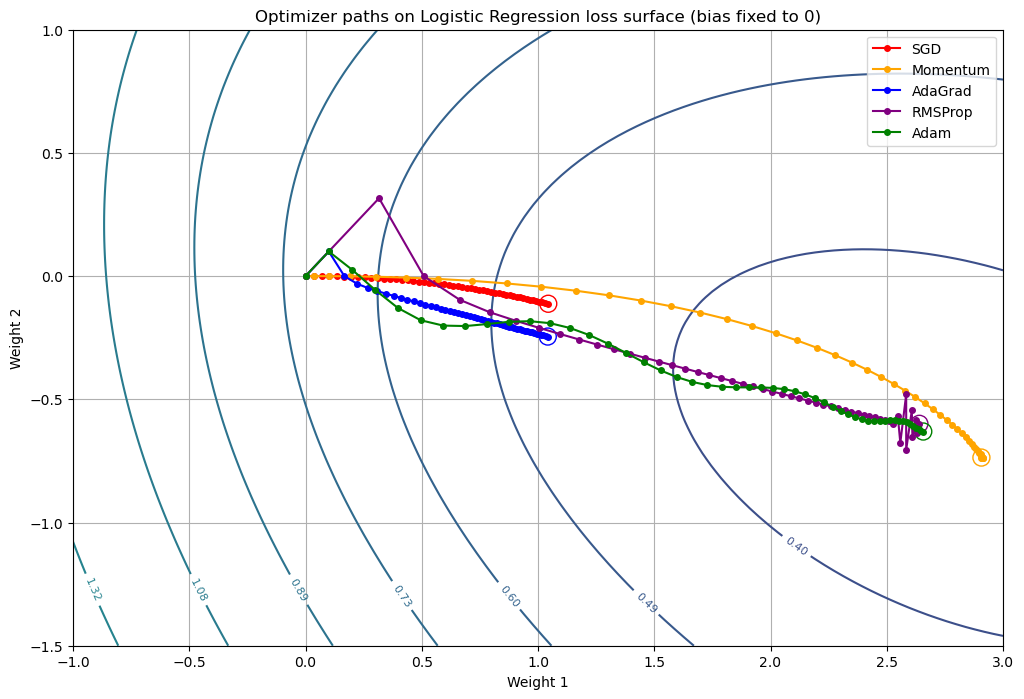

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Create a simple 2D classification dataset
X, y = make_classification(
    n_samples=200, n_features=2, n_redundant=0, n_informative=2, 
    n_clusters_per_class=1, random_state=42
)
X = StandardScaler().fit_transform(X)

# Add bias term to features
X = np.hstack([np.ones((X.shape[0], 1)), X])  # shape (200, 3)

# Split dataset (not used for this demo, but good practice)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic regression model and loss function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_loss(w, X, y):
    preds = sigmoid(X @ w)
    # Logistic loss (binary cross-entropy)
    return -np.mean(y * np.log(preds + 1e-8) + (1 - y) * np.log(1 - preds + 1e-8))

def compute_gradient(w, X, y):
    preds = sigmoid(X @ w)
    return X.T @ (preds - y) / len(y)

# Training function that records parameter paths
def train_optimizer(X, y, optimizer, lr=0.1, epochs=50):
    w = np.zeros(X.shape[1])  # Initialize weights (3 params: bias + 2 features)
    path = [w.copy()]
    
    # Optimizer state for Adam and RMSProp
    m = np.zeros_like(w)
    v = np.zeros_like(w)
    beta1, beta2 = 0.9, 0.999
    epsilon = 1e-8
    
    for t in range(1, epochs+1):
        grad = compute_gradient(w, X, y)
        
        if optimizer == 'SGD':
            w -= lr * grad
        
        elif optimizer == 'Momentum':
            if t == 1:
                v_momentum = np.zeros_like(w)
            v_momentum = 0.9 * v_momentum + lr * grad
            w -= v_momentum
        
        elif optimizer == 'AdaGrad':
            if t == 1:
                cache = np.zeros_like(w)
            cache += grad**2
            w -= lr * grad / (np.sqrt(cache) + epsilon)
        
        elif optimizer == 'RMSProp':
            if t == 1:
                cache = np.zeros_like(w)
            cache = 0.9 * cache + 0.1 * grad**2
            w -= lr * grad / (np.sqrt(cache) + epsilon)
        
        elif optimizer == 'Adam':
            m = beta1 * m + (1 - beta1) * grad
            v = beta2 * v + (1 - beta2) * (grad**2)
            m_hat = m / (1 - beta1**t)
            v_hat = v / (1 - beta2**t)
            w -= lr * m_hat / (np.sqrt(v_hat) + epsilon)
        
        else:
            raise ValueError(f"Unknown optimizer: {optimizer}")
        
        path.append(w.copy())
    return np.array(path)

# Train and collect paths for each optimizer
optimizers = ['SGD', 'Momentum', 'AdaGrad', 'RMSProp', 'Adam']
paths = {opt: train_optimizer(X_train, y_train, opt, lr=0.1, epochs=50) for opt in optimizers}


# Define a grid to plot the loss surface with two weights: w1 and w2 (ignore bias for plotting)
w1_vals = np.linspace(-1, 3, 100)
w2_vals = np.linspace(-1.5, 1, 100)
W1, W2 = np.meshgrid(w1_vals, w2_vals)
Z = np.zeros_like(W1)

# Fix bias weight to zero for visualization (just for plotting 2D slice)
bias = 0

for i in range(W1.shape[0]):
    for j in range(W1.shape[1]):
        w = np.array([bias, W1[i,j], W2[i,j]])
        Z[i,j] = compute_loss(w, X_train, y_train)

# Plot loss surface and optimizer paths
plt.figure(figsize=(12, 8))
levels = np.logspace(-1, 1.5, 30)
contour = plt.contour(W1, W2, Z, levels=levels, norm=LogNorm(), cmap='viridis')

plt.clabel(contour, inline=1, fontsize=8)
plt.title("Optimizer paths on Logistic Regression loss surface (bias fixed to 0)")
plt.xlabel("Weight 1")
plt.ylabel("Weight 2")

colors = {'SGD': 'red', 'Momentum': 'orange', 'AdaGrad': 'blue', 'RMSProp': 'purple', 'Adam': 'green'}

for opt in optimizers:
    path = paths[opt]
    plt.plot(path[:,1], path[:,2], marker='o', markersize=4, label=opt, color=colors[opt])
    plt.scatter(path[-1,1], path[-1,2], s=150, facecolors='none', edgecolors=colors[opt])

plt.legend()
plt.grid(True)
plt.show()